# Wrangle And Analyze Data

## Overview

- WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.
- We erangle and anazlyzed the data here for further analysis and visualisation

### Step 1:
# Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
% matplotlib inline

In [2]:
df= pd.read_csv('twitter-archive-enhanced.csv') #read the flat file twitter-archive-enhanced.csv Programmatically
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
import requests # Programmatically download the image_prediction file using the request library from Udacity's servers
import os 
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
response = requests.get(url)
with open(os.path.join(folder_name , url.split('/')[-1]),mode ='wb') as file: #same method as taught in the lesson "Download File from Internet"
    file.write(response.content)

In [4]:
images_df = pd.read_csv('image-predictions/image-predictions.tsv' ,sep='\t')

In [5]:
import tweepy #Query the Twitter API for each tweet's JSON data using Python's Tweepy library

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
available_ids = list(df.tweet_id)

In [6]:
data_tweets = {}
for tweet in available_ids: #if the tweet id is in the list of available tweet ids(not deleted)
    try:
        tweet_stat = api.get_status(tweet,tweet_mode='extended', #https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        data_tweets[str(tweet)] = tweet_stat._json #storing the tweet ids and make the object JSoN serializable (https://stackoverflow.com/questions/3768895/how-to-make-a-class-json-serializable)
    except: 
        continue

Rate limit reached. Sleeping for: 17
Rate limit reached. Sleeping for: 2


In [7]:
with open('tweet_json.txt', 'w',encoding='utf8') as file_open:  
    json.dump(data_tweets, file_open, sort_keys = True)

In [9]:
tweet_additional = pd.read_json('tweet_json.txt',orient='index')

### Step 2:
# Assessing

### Visual Assessment

In [10]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
tweet_additional

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2565,0,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,NaN,NaN,NaN,NaN,517,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,This is a western brown Mitsubishi terrier. Up...,NaN,...,NaN,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,Here is a very happy pup. Big fan of well-main...,NaN,...,NaN,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,299,0,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,NaN,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,NaN,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"[0, 140]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,133,0,This is a truly beautiful English Wilson Staff...,NaN,...,NaN,NaN,NaN,NaN,58,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"[0, 138]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1222,0,This is an odd dog. Hard on the outside but lo...,NaN,...,NaN,NaN,NaN,NaN,852,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"[0, 140]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,434,0,Here is a Siberian heavily armored polar bear ...,NaN,...,NaN,NaN,NaN,NaN,252,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"[0, 124]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,298,0,My oh my. This is a rare blond Canadian terrie...,NaN,...,NaN,NaN,NaN,NaN,142,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"[0, 135]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,111,0,Here is the Rand Paul of retrievers folks! He'...,NaN,...,NaN,NaN,NaN,NaN,57,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."


## Programmatic Assessment

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df.retweeted_status_id

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19      8.874740e+17
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341             NaN
2342         

In [15]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
df.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [17]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
tweet_additional.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2344 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2344 non-null datetime64[ns]
display_text_range               2344 non-null object
entities                         2344 non-null object
extended_entities                2068 non-null object
favorite_count                   2344 non-null int64
favorited                        2344 non-null int64
full_text                        2344 non-null object
geo                              0 non-null float64
id                               2344 non-null int64
id_str                           2344 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              

In [22]:
sum((tweet_additional['retweeted_status'].isnull())== False)

170

In [23]:
(df['tweet_id'].duplicated()).sum() 

0

## Analysis

## Quality Issues
  Parameters to consider:
  *1.Completeness*
  *2.Validity*
  *3.Accuracy*
  *4.Consistency*
  
  ### df (Twitter Archive)
  - Unnecessary rows of Retweets exists 
  - Dogs have wrong names like a, an, the ,etc.
  - Timestamp column is of type Object
  - Denominator value is not 10 for all dog names
  - Remove unnecessary columnns 
  ###  images_df
  - Capitalise names and remove _ in columns p1, p2 and p3 
  
  ### tweet_additional
  - Rename column id as tweet_id
  - Drop additional columns not necessary 
  - Retweets are present

  ## Tidiness
  - Combine image_df and tweet_additional to  main df
  - Map data of doggo ,floofer, pupper, puppo
  - Make a seperate column for date

### Step 3:
## Cleaning


In [24]:
# Making copying of the original data
df_copy = df.copy()
images_df_copy =images_df.copy()
tweet_additional_copy = tweet_additional.copy()


In [26]:
# Making copying of the copied data as backup
x1=df_copy.copy()
x2=images_df_copy.copy()
x3=tweet_additional_copy.copy()

## tweet_additional
1.Drop additional columns that are not necessary from additional tweet info

*Define*
###### Remove unnecessary rows from tweet_additional, retaining only ids, retweets, likes

*Code*

In [29]:
list(tweet_additional_copy.columns.values)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [30]:
tweet_additional_copy.drop(['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorited',
 'full_text',
 'geo',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'source',
 'truncated',
 'user'], axis= 1 , inplace= True)

In [31]:
tweet_additional_copy = tweet_additional_copy[['id','favorite_count','retweet_count','retweeted','retweeted_status']] #rearrange

*Test*

In [33]:
tweet_additional_copy.head()

,id,favorite_count,retweet_count,retweeted,retweeted_status
1991-02-08 13:48:08.022790149,666020888022790144,2565,517,0,NaN
1991-02-08 16:08:05.002620928,666029285002620928,130,47,0,NaN
1991-02-08 17:16:52.701032449,666033412701032448,125,44,0,NaN
1991-02-08 20:17:06.329800704,666044226329800704,299,141,0,NaN
1991-02-08 21:40:48.165822465,666049248165822464,109,41,0,NaN


#### 2. Rename column id as tweet_id

### Define
Use rename function to rename *id* to *tweet_id* for better join


### Code

In [34]:
tweet_additional_copy.rename(columns={'id':'tweet_id'}, inplace= True)

### Test

In [36]:
list(tweet_additional_copy.columns.values)

['tweet_id',
 'favorite_count',
 'retweet_count',
 'retweeted',
 'retweeted_status']

3. Remove retweets from the table

## Define
- Use isnull() to get only actual tweets

## Code

In [38]:
tweet_additional_copy = tweet_additional_copy[tweet_additional_copy['retweeted_status'].isnull()]

In [40]:
tweet_additional_copy.drop(['retweeted_status','retweeted'],axis=1,inplace=True)

## Test

In [41]:
tweet_additional_copy

,tweet_id,favorite_count,retweet_count
1991-02-08 13:48:08.022790149,666020888022790144,2565,517
1991-02-08 16:08:05.002620928,666029285002620928,130,47
1991-02-08 17:16:52.701032449,666033412701032448,125,44
1991-02-08 20:17:06.329800704,666044226329800704,299,141
1991-02-08 21:40:48.165822465,666049248165822464,109,41
1991-02-08 22:05:58.794694657,666050758794694656,133,58
1991-02-08 22:24:13.826850816,666051853826850816,1222,852
1991-02-08 23:25:25.042405380,666055525042405376,434,252
1991-02-08 23:51:30.499244032,666057090499244032,298,142
1991-02-09 00:16:40.524156928,666058600524156928,111,57


# Images_df

4.Names in the columns of images_df have _ instead of ' '

### Definition
- Use replace function to replace with _ with ' '
- Use title() to capitalize the first word of each new name

In [42]:
images_df_copy['p1'] = images_df_copy['p1'].str.replace('_', ' ')
images_df_copy['p2'] = images_df_copy['p2'].str.replace('_', ' ')
images_df_copy['p3'] = images_df_copy['p3'].str.replace('_', ' ')

In [43]:
images_df_copy['p1'] = images_df_copy['p1'].str.title()
images_df_copy['p2'] = images_df_copy['p2'].str.title()
images_df_copy['p3'] = images_df_copy['p3'].str.title()

In [44]:
images_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
images_df_copy1=images_df_copy.copy()

# df(Tweet archives)



5. Unnecessary rows of Retweets exists

### Define 
- Retweeted tweets are not original tweets, so they need to be dropped
    

### Code

In [48]:
sum(df_copy.retweeted_status_id.isnull()==True) 

2175

In [49]:
df_copy = df_copy[df_copy['retweeted_status_id'].isnull()]

### Test

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

6.Drop columns in main dataframe that are not useful

## Definition
Columns like retweet_status_user_id , in_reply_to_status_id are not necessary and are dropped from the table

## Code

In [52]:
list(df_copy.columns.values)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [53]:
df_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','source','text','expanded_urls'], axis=1,inplace=True)

## Test

In [54]:
df_copy.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,None,None,None,None


7 .Wrong and invalid names 

## Define
- `names`  column has many invalid names which is replaced with None

## Code

In [55]:
list(df_copy.name[df_copy['name'].str.islower()].unique())

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [58]:
names1= ['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']
x=0

for names1[x] in names1 : #Running a loop to iterate each lower cased wrong name in the array which is ventually replaced by None
    df_copy['name'].replace(names1[x], 'None', inplace=True)
    x=x+1

In [59]:
df_copy['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
1954          Albert
875           Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
1616           Alfie
367            Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
563           Winnie
986          Winston
1829         Winston
407          Winston
2133         Winston
816          Winston
280          Winston
559          Winston
1243         Winston
877           Wishes
410            Wyatt
174            Wyatt
1451           Wyatt
1378            Yoda
622             Yogi
43              Yogi
1409         

8. Timestamp is of type object
# Tidiness 
-1. Making a seperate column for date

# Define
- use .to_datetime to convert object type to datetime type

# Code

In [60]:
df_copy['time'] = pd.to_datetime(df_copy['timestamp']) #https://stackoverflow.com/questions/39662149/pandas-extract-date-and-time-from-timestamp
df_copy['dates'] = df_copy['time'].dt.date

In [61]:
df_copy.drop(['timestamp'],axis=1,inplace=True)

# Test

In [62]:
df_copy.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,time,dates
0,892420643555336193,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01
1,892177421306343426,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27,2017-08-01
2,891815181378084864,12,10,Archie,None,None,None,None,2017-07-31 00:18:03,2017-07-31
3,891689557279858688,13,10,Darla,None,None,None,None,2017-07-30 15:58:51,2017-07-30
4,891327558926688256,12,10,Franklin,None,None,None,None,2017-07-29 16:00:24,2017-07-29


9. Rating Denominator for all tweets isn't 10

## Defintion
- All the values in the column `rating_denominator` are made 10

## Code

In [69]:
x2=df_copy.copy()

In [66]:
df_copy.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [70]:
df_copy.rating_denominator[df_copy['rating_denominator']!=10] =10

C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Test

In [71]:
df_copy.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

# Tidiness

2. 4 columns of dog stages can be brought down to 1 main column

### Definition

Values from columns doggo ,floofer ,pupper and puppo are extracted into a new column 

## Code

In [162]:
df_copy8 = df_copy.copy() # Lost the values original data frame while committing a mistake
df_copy8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
time                  2175 non-null datetime64[ns]
dates                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


In [163]:
list(df_copy.columns.values)

['tweet_id',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'time',
 'dates']

In [164]:
df_copy = pd.melt(df_copy, id_vars=['tweet_id','rating_numerator','rating_denominator','name','time','dates'],var_name='names',value_name='Stages')
# Melting

In [165]:
df_copy= df_copy.drop('names', 1)# Drop var_names
df_copy = df_copy.sort_values('Stages').drop_duplicates(subset='tweet_id', keep='last') #Droping Duplicates and retaining only the last set of sorted Stages value 

In [167]:
df_copy=df_copy.sort_values(by='dates',axis=0,ascending=False) # Sorting by data

# Test

In [168]:
df_copy.Stages.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: Stages, dtype: int64

In [169]:
df_copy

,tweet_id,rating_numerator,rating_denominator,name,time,dates,Stages
2175,892420643555336193,13,10,Phineas,2017-08-01 16:23:56,2017-08-01,None
1,892177421306343426,13,10,Tilly,2017-08-01 00:17:27,2017-08-01,None
2,891815181378084864,12,10,Archie,2017-07-31 00:18:03,2017-07-31,None
3,891689557279858688,13,10,Darla,2017-07-30 15:58:51,2017-07-30,None
4,891327558926688256,12,10,Franklin,2017-07-29 16:00:24,2017-07-29,None
5,891087950875897856,13,10,None,2017-07-29 00:08:17,2017-07-29,None
6,890971913173991426,13,10,Jax,2017-07-28 16:27:12,2017-07-28,None
7,890729181411237888,13,10,None,2017-07-28 00:22:40,2017-07-28,None
8,890609185150312448,13,10,Zoey,2017-07-27 16:25:51,2017-07-27,None
9,890240255349198849,14,10,Cassie,2017-07-26 15:59:51,2017-07-26,doggo


## 3. Tidiness:
 - Merging df_copy and images_df
 - Merging the above merged table and tweet_additional

## Defintion
Usin inner merge for both the merges

## Code

In [182]:
df_main_twitter=pd.merge(df_copy,images_df_copy,how = 'inner', on = ['tweet_id'])

In [183]:
df_main_twitter1= pd.merge(df_main_twitter,tweet_additional_copy,how = 'inner', on = ['tweet_id'])

## Test

In [184]:
df_main_twitter1

,tweet_id,rating_numerator,rating_denominator,name,time,dates,Stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,891815181378084864,12,10,Archie,2017-07-31 00:18:03,2017-07-31,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,24944,4166
1,891689557279858688,13,10,Darla,2017-07-30 15:58:51,2017-07-30,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42042,8683
2,891327558926688256,12,10,Franklin,2017-07-29 16:00:24,2017-07-29,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,40195,9440
3,891087950875897856,13,10,None,2017-07-29 00:08:17,2017-07-29,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,20159,3124
4,890729181411237888,13,10,None,2017-07-28 00:22:40,2017-07-28,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,65307,18963
5,890609185150312448,13,10,Zoey,2017-07-27 16:25:51,2017-07-27,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True,27705,4278
6,890006608113172480,13,10,Koda,2017-07-26 00:31:25,2017-07-26,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True,30573,7361
7,889638837579907072,12,10,Ted,2017-07-25 00:10:02,2017-07-25,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French Bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True,27094,4560
8,889278841981685760,13,10,Oliver,2017-07-24 00:19:32,2017-07-24,None,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,Whippet,0.626152,True,Borzoi,0.194742,True,Saluki,0.027351,True,25215,5438
9,888917238123831296,12,10,Jim,2017-07-23 00:22:39,2017-07-23,None,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,Golden Retriever,0.714719,True,Tibetan Mastiff,0.120184,True,Labrador Retriever,0.105506,True,28993,4512


In [188]:
df_main_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 20 columns):
tweet_id              1299 non-null int64
rating_numerator      1299 non-null int64
rating_denominator    1299 non-null int64
name                  1299 non-null object
time                  1299 non-null datetime64[ns]
dates                 1299 non-null object
Stages                1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog                1299 non-null bool
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
dtypes: bool(3), datetime64[ns](1)

In [203]:

df_main_twitter1['rating_denominator'] = df_main_twitter1['rating_denominator'].astype(float)
df_main_twitter1['rating_numerator'] = df_main_twitter1['rating_numerator'].astype(float)


In [204]:
df_main_twitter1.head()

,tweet_id,rating_numerator,rating_denominator,name,time,dates,Stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,891815181378084864,12.0,10.0,Archie,2017-07-31 00:18:03,2017-07-31,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,24944,4166
1,891689557279858688,13.0,10.0,Darla,2017-07-30 15:58:51,2017-07-30,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42042,8683
2,891327558926688256,12.0,10.0,Franklin,2017-07-29 16:00:24,2017-07-29,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,40195,9440
3,891087950875897856,13.0,10.0,None,2017-07-29 00:08:17,2017-07-29,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,20159,3124
4,890729181411237888,13.0,10.0,None,2017-07-28 00:22:40,2017-07-28,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,65307,18963


# Saving

In [190]:
df_main_twitter1.to_csv('twitter_archive_master.csv', encoding='utf-8')

# Analyse

In [252]:
df_main_twitter3 = pd.read_csv('twitter_archive_master.csv')
df_main_twitter1 =df_main_twitter3.copy()
df_main_twitter1['rating_denominator'] = df_main_twitter1['rating_denominator'].astype(float)
df_main_twitter1['rating_numerator'] = df_main_twitter1['rating_numerator'].astype(float)


In [253]:
df_main_twitter1['net_rating'] = df_main_twitter1['rating_numerator']/df_main_twitter1['rating_denominator']

## Analysis 1 with Visualization

Trying to draw a relation between the Stages of the images of the dog submitted and the ratings, favorites, retweets

In [258]:
df_main_twitter1.groupby('Stages')['net_rating'].mean()

Stages
None       1.319909
doggo      1.144118
floofer    1.140000
pupper     1.069799
puppo      1.193750
Name: net_rating, dtype: float64

In [255]:
df_main_twitter1.groupby('Stages')['retweet_count'].mean()

Stages
None       2440.657534
doggo      4953.235294
floofer    2446.200000
pupper     2254.919463
puppo      5285.250000
Name: retweet_count, dtype: float64

In [264]:
df_main_twitter1.groupby('Stages')['favorite_count'].mean()

Stages
None        8141.026484
doggo      14591.088235
floofer     7959.600000
pupper      6867.127517
puppo      16919.437500
Name: favorite_count, dtype: float64

Text(0,0.5,'Favorites')

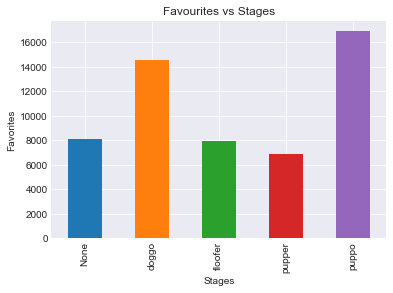

In [270]:
df_main_twitter1.groupby('Stages')['favorite_count'].mean().plot(kind='bar', title='Favourites vs Stages')
plt.ylabel('Favorites')

Text(0,0.5,'Retweets')

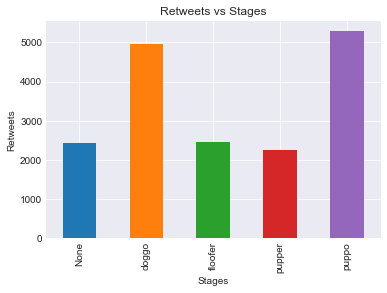

In [269]:
df_main_twitter1.groupby('Stages')['retweet_count'].mean().plot(kind='bar', title='Retweets vs Stages')
plt.ylabel('Retweets')

## Conclusion 1
- Puppo and Doggo Stages seem to get the highest numbers of retweets and favorites with Puppo getting the most attention

## Analysis 2 and Visualization
- Getting a trend between Ratings and Retweets
- And Retweets and Favorites

In [276]:
df_main_twitter1.groupby('net_rating')['retweet_count'].mean()

net_rating
0.1      2968.000000
0.2      1741.400000
0.3       743.153846
0.4      1140.923077
0.5      1302.105263
0.6      1114.272727
0.7      1124.857143
0.8       929.468750
0.9       706.322917
1.0      1554.717105
1.1      2026.638554
1.2      3124.567944
1.3      5919.700637
1.4      9855.222222
2.4      1604.000000
2.7      1815.000000
4.4      1504.000000
4.5       695.000000
6.0      1000.000000
7.5      6822.000000
8.8      1401.000000
14.3      230.000000
14.4     1058.000000
16.5     2463.000000
20.4     1386.000000
42.0     9238.000000
177.6    2698.000000
Name: retweet_count, dtype: float64

In [339]:
plot_x=df_main_twitter1.query('rating_numerator < 30')

Text(0.5,1,'Rating vs Favorites')

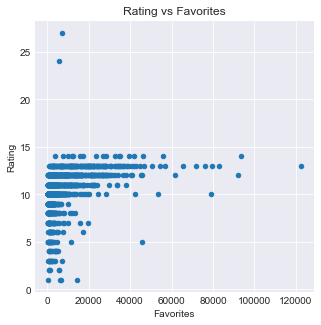

In [345]:
plot_x.plot(kind='scatter', x='favorite_count',y= 'rating_numerator',figsize=(5,5))
plt.xlabel('Favorites')
plt.ylabel('Rating')
plt.title('Rating vs Favorites')

Text(0.5,1,'Retweets vs Favorite')

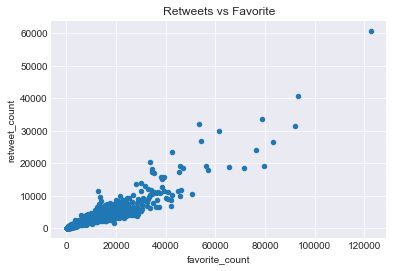

In [338]:
df_main_twitter1.plot(kind='scatter', x='favorite_count',y= 'retweet_count')
plt.title('Retweets vs Favorite')
plt.xlabel('Favorites')
plt.ylabel('Retweet')

## Conclusion
- Images with higher rating doesn't always get the highest number of retweets or likes but in general they have higher number of favorites than lower rated images
- On the other hand, there is a positive correlation between favorites and retweets

# Analysis 3
- Does names in the text affect the rating and retweets of the images

In [302]:
x1 = df_main_twitter1[df_main_twitter1['name']=='None'] #Filtering With improper names and Nones

In [303]:
x2 = df_main_twitter1[df_main_twitter1['name']!='None'] #Excluding Nones

In [347]:
x2['retweet_count'].mean(),x1['retweet_count'].mean()

(2493.081300813008, 2573.4360730593608)

In [351]:
x1['rating_numerator'].mean(),x2['rating_numerator'].mean()

(13.002283105022832, 12.763066202090592)

## Conclusion 
- Presence of Name of the dog in the text of the tweet does not affect the popularity of the images 

# Analysis 4
- Analyse the data drawen from the image_prediction table to analyze the confidence level 

In [360]:
list(df_main_twitter1.columns.values)

['Unnamed: 0',
 'tweet_id',
 'rating_numerator',
 'rating_denominator',
 'name',
 'time',
 'dates',
 'Stages',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'net_rating']

In [361]:
Image_predictions_analysis= df_main_twitter1[['p1','p1_conf','p2','p2_conf','p3','p3_conf']] # Only the required columns

In [362]:
Image_predictions_analysis.describe()

,p1_conf,p2_conf,p3_conf
count,1299.000000,1.299000e+03,1.299000e+03
mean,0.587034,1.370495e-01,6.144723e-02
std,0.273638,1.018687e-01,5.202736e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.354703,5.438335e-02,1.649005e-02
50%,0.578120,1.203580e-01,4.953060e-02
75%,0.837040,1.982365e-01,9.470910e-02
max,1.000000,4.676780e-01,2.710420e-01


In [363]:
(Image_predictions_analysis['p1_conf']==1).sum()

1

In [366]:
((Image_predictions_analysis['p1_conf'])>(Image_predictions_analysis['p2_conf'])).sum()

1299

## Conclusion
- The first attempt to guess the breed by the Neural Network resulted in an impressive confidence of 0.587 
- There is one attempt with a confidence of 1 for p1